    2) impara gli alberi ma cerca di evitare l'overfitting (migliorando l'errore sul test set) regolando gli iperparametri su: 
    - il numero minimo di campioni per foglia
    - la profondità massima dell'albero
    - il parametro min_impurity_decrease
    - il numero massimo di foglie
    - ecc.

In [1]:
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import graphviz

Accuracy score: 0.9
F1 score: 0.8857142857142858
[0.93333333 0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.86666667 1.         1.         1.        ]


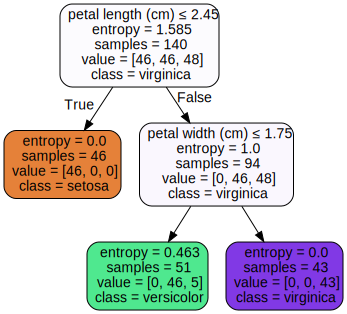

In [20]:
iris = load_iris()
clf = tree.DecisionTreeClassifier(
    criterion = "entropy",
    random_state = 300,
    min_samples_leaf = 5,
    class_weight = {0:1,1:1,2:1},
    max_depth = 4,
    min_impurity_decrease = 0.10
)

np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training = indices[:-10]
indices_test = indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

predicted_y_test = clf.predict(iris_X_test)

acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

scores = cross_val_score(clf, iris.data, iris.target, cv=10)
print(scores)

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

- con 5 foglie
    Accuracy score: 0.9
    F1 score: 0.8857142857142858
    [1.         0.93333333 1.         1.         0.93333333 0.86666667 0.86666667 1.         1.         1.        ]

- con 10 foglie
    Accuracy score: 0.9
    F1 score: 0.8857142857142858
    [0.93333333 0.93333333 1.         0.93333333 0.93333333 0.86666667 0.86666667 1.         1.         1.        ]

- con 20 foglie
    Accuracy score: 0.9
    F1 score: 0.8857142857142858
    [0.93333333 0.93333333 1.         0.93333333 0.93333333 0.86666667 0.86666667 1.         1.         1.        ]

- con 50 foglie
    Accuracy score: 0.6
    F1 score: 0.5
    [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]

- con 5 foglie e profondita' massima 4
    Accuracy score: 0.9
    F1 score: 0.8857142857142858
    [1.         0.93333333 1.         1.         0.93333333 0.86666667 0.86666667 1.         1.         1.        ]

- con 5 foglie e profondita' massima 3
    Accuracy score: 0.9
    F1 score: 0.8857142857142858
    [1.         0.93333333 1.         1.         0.93333333 0.86666667 0.86666667 1.         1.         1.        ]

- con 5 foglie e profondita' massima 2
    Accuracy score: 0.9
    F1 score: 0.8857142857142858
    [0.93333333 0.93333333 1.         0.93333333 0.93333333 0.86666667 0.86666667 1.         1.         1.        ]

